#Import Libary

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn import model_selection
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras import regularizers
from sklearn.metrics import classification_report
from keras.utils.np_utils import to_categorical
import statistics

In [2]:
data = pd.read_csv('/Users/peeradonruengkaew/Downloads/AI-Project-Heart-Disease-Classification-main/heart.csv')


#data mange for MLP

In [3]:
binary_vars_list=['Sex','ExerciseAngina']
def binary_map(x):
    return x.map({'Y':1,'N':0,'M':1,'F':0})
    

#applying the function to the housing variables list
data[binary_vars_list] = data[binary_vars_list].apply(binary_map)

def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = False)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the data

data = dummies('ChestPainType',data)
data = dummies('RestingECG',data)
data = dummies('ST_Slope',data)

scaler = MinMaxScaler()

numeric_vars = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
data[numeric_vars] = scaler.fit_transform(data[numeric_vars])

data.drop(['TA'], axis = 1, inplace = True)
data.drop(['LVH'], axis = 1, inplace = True)
data.drop(['Normal'], axis = 1, inplace = True)
data.drop(['ST'], axis = 1, inplace = True)
data.drop(['RestingBP'], axis = 1, inplace = True)
data.drop(['Down'], axis = 1, inplace = True)

x = np.array(data.drop(['HeartDisease'],axis=1))
#x
y = np.array(data['HeartDisease'])
#y

#MLP with l2 & drop out

In [78]:
re=regularizers.L2(0.1)
def create_model_1():
    model_1 = Sequential()
    model_1.add(Dropout(0.1, input_dim = 12))
    model_1.add(Dense(6, activation = 'relu',kernel_regularizer=re))
    model_1.add(Dropout(0.1))
    model_1.add(Dense(10, activation = 'relu'))
    model_1.add(Dropout(0.1))
    model_1.add(Dense(8, activation = 'relu'))
    model_1.add(Dense(2, activation = 'sigmoid'))
    model_1.compile(optimizer = Adam(learning_rate=0.00036), loss = 'binary_crossentropy', metrics = ['accuracy']) 
    return model_1

model_1 = create_model_1()

print(model_1.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_15 (Dropout)        (None, 12)                0         
                                                                 
 dense_44 (Dense)            (None, 6)                 78        
                                                                 
 dropout_16 (Dropout)        (None, 6)                 0         
                                                                 
 dense_45 (Dense)            (None, 10)                70        
                                                                 
 dropout_17 (Dropout)        (None, 10)                0         
                                                                 
 dense_46 (Dense)            (None, 8)                 88        
                                                                 
 dense_47 (Dense)            (None, 2)               

In [79]:
history_temp=[]
MLP_F1_temp=[]
MLP_acc_temp=[]
MLP_acctr_temp=[]
MLP_recall_temp=[]

for i in range(5):
  if i==0:
    seed=100
  elif i==1:
    seed=123
  elif i==2:
    seed=200
  elif i==3:
    seed=231
  else:
    seed=321

  xtrain_1, xtest_1, ytrain_1, ytest_1 = model_selection.train_test_split(x, y, stratify = y, random_state = seed,train_size = 0.7, test_size = 0.3)

  ytrain_1 = to_categorical(ytrain_1, num_classes = None)
  ytest_1 = to_categorical(ytest_1, num_classes = None)

  history=model_1.fit(xtrain_1, ytrain_1, validation_data=(xtest_1, ytest_1),epochs=80, batch_size=4)
  history_temp.append(history)

  y_pred = model_1.predict(xtest_1,batch_size=None)
  y_pred_train = model_1.predict(xtrain_1,batch_size=None)
  ypredbool = np.argmax(y_pred, axis=1)
  ypredbool = to_categorical(ypredbool, num_classes = None)
  ypredbooltr = np.argmax(y_pred_train, axis=1)
  ypredbooltr = to_categorical(ypredbooltr, num_classes = None)
  MLP_f1_score_1 = metrics.f1_score(ytest_1, ypredbool, average=None)
  MLP_acc_score_1=metrics.accuracy_score(ytest_1, ypredbool)
  MLP_acc_score_train_1=metrics.accuracy_score(ytrain_1, ypredbooltr)
  MLP_recall_score_1 = metrics.recall_score(ytest_1, ypredbool, average=None)

  MLP_F1_temp.append(MLP_f1_score_1[1])
  MLP_acc_temp.append(MLP_acc_score_1)
  MLP_acctr_temp.append(MLP_acc_score_train_1)
  MLP_recall_temp.append(MLP_recall_score_1[1])



Epoch 1/80
161/161 [==============================] - 1s 3ms/step - loss: 1.3335 - accuracy: 0.5732 - val_loss: 1.2322 - val_accuracy: 0.6159
Epoch 2/80
161/161 [==============================] - 0s 2ms/step - loss: 1.1505 - accuracy: 0.6604 - val_loss: 1.0718 - val_accuracy: 0.7681
Epoch 3/80
161/161 [==============================] - 0s 2ms/step - loss: 1.0008 - accuracy: 0.7586 - val_loss: 0.9319 - val_accuracy: 0.8080
Epoch 4/80
161/161 [==============================] - 0s 2ms/step - loss: 0.8699 - accuracy: 0.7773 - val_loss: 0.8103 - val_accuracy: 0.7971
Epoch 5/80
161/161 [==============================] - 0s 2ms/step - loss: 0.7587 - accuracy: 0.8069 - val_loss: 0.7136 - val_accuracy: 0.8225
Epoch 6/80
161/161 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.8209 - val_loss: 0.6316 - val_accuracy: 0.8333
Epoch 7/80
161/161 [==============================] - 0s 2ms/step - loss: 0.6001 - accuracy: 0.8318 - val_loss: 0.5666 - val_accuracy: 0.8514
Epoch 

In [80]:
print(MLP_F1_temp)
print(MLP_acc_temp)
print(MLP_acctr_temp)
print(MLP_recall_temp)

delta1=MLP_acctr_temp[0]-MLP_acc_temp[0]
delta2=MLP_acctr_temp[1]-MLP_acc_temp[1]
delta3=MLP_acctr_temp[2]-MLP_acc_temp[2]
delta4=MLP_acctr_temp[3]-MLP_acc_temp[3]
delta5=MLP_acctr_temp[4]-MLP_acc_temp[4]
MLP_delta_temp=[delta1,delta2,delta3,delta4,delta5]
MLP=pd.DataFrame({'seed':[100,123,200,231,321],'Recall':[MLP_recall_temp[0],MLP_recall_temp[1],MLP_recall_temp[2],MLP_recall_temp[3],
                                                     MLP_recall_temp[4]],'Train accuracy':[MLP_acc_temp[0],MLP_acc_temp[1],MLP_acc_temp[2],
                                                    MLP_acc_temp[3],MLP_acc_temp[4]],'Accuracy':[MLP_acctr_temp[0],MLP_acctr_temp[1],MLP_acctr_temp[2],
                                                    MLP_acctr_temp[3],MLP_acctr_temp[4]],'diferent of Accuracy':[delta1,delta2,delta3,delta4,delta5],'F1':[MLP_F1_temp[0],MLP_F1_temp[1],MLP_F1_temp[2],
                                                    MLP_F1_temp[3],MLP_F1_temp[4]]})
MLP

[0.8664495114006514, 0.89171974522293, 0.8895705521472391, 0.8958990536277602, 0.8807339449541284]
[0.8514492753623188, 0.8768115942028986, 0.8695652173913043, 0.8804347826086957, 0.8586956521739131]
[0.8753894080996885, 0.8691588785046729, 0.8707165109034268, 0.8644859813084113, 0.881619937694704]
[0.869281045751634, 0.9150326797385621, 0.9477124183006536, 0.9281045751633987, 0.9411764705882353]


,seed,Recall,Train accuracy,Accuracy,diferent of Accuracy,F1
0,100,0.869281,0.851449,0.875389,0.023940,0.866450
1,123,0.915033,0.876812,0.869159,-0.007653,0.891720
2,200,0.947712,0.869565,0.870717,0.001151,0.889571
3,231,0.928105,0.880435,0.864486,-0.015949,0.895899
4,321,0.941176,0.858696,0.881620,0.022924,0.880734


#Only MLP

In [81]:
re=regularizers.L2(0.1)
def create_model_2():
    model_2 = Sequential()
    #model_1.add(Dropout(0.1, input_dim = 12))
    model_2.add(Dense(6,input_dim = 12, activation = 'relu'))
    #model_1.add(Dropout(0.1))
    model_2.add(Dense(10, activation = 'relu'))
    #model_1.add(Dropout(0.1))
    model_2.add(Dense(8, activation = 'relu'))
    model_2.add(Dense(2, activation = 'sigmoid'))
    model_2.compile(optimizer = Adam(learning_rate=0.00036), loss = 'binary_crossentropy', metrics = ['accuracy']) 
    return model_2

model_2 = create_model_2()

print(model_2.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 6)                 78        
                                                                 
 dense_49 (Dense)            (None, 10)                70        
                                                                 
 dense_50 (Dense)            (None, 8)                 88        
                                                                 
 dense_51 (Dense)            (None, 2)                 18        
                                                                 
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________
None


In [82]:
history0_temp=[]
MLP0_F1_temp=[]
MLP0_acc_temp=[]
MLP0_acctr_temp=[]
MLP0_recall_temp=[]

for i in range(5):
  if i==0:
    seed=100
  elif i==1:
    seed=123
  elif i==2:
    seed=200
  elif i==3:
    seed=231
  else:
    seed=321

  xtrain_1, xtest_1, ytrain_1, ytest_1 = model_selection.train_test_split(x, y, stratify = y, random_state = seed,train_size = 0.7, test_size = 0.3)

  ytrain_1 = to_categorical(ytrain_1, num_classes = None)
  ytest_1 = to_categorical(ytest_1, num_classes = None)

  history=model_2.fit(xtrain_1, ytrain_1, validation_data=(xtest_1, ytest_1),epochs=80, batch_size=4)
  history0_temp.append(history)

  y_pred = model_2.predict(xtest_1,batch_size=None)
  y_pred_train = model_2.predict(xtrain_1,batch_size=None)
  ypredbool = np.argmax(y_pred, axis=1)
  ypredbool = to_categorical(ypredbool, num_classes = None)
  ypredbooltr = np.argmax(y_pred_train, axis=1)
  ypredbooltr = to_categorical(ypredbooltr, num_classes = None)
  MLP0_f1_score_1 = metrics.f1_score(ytest_1, ypredbool, average=None)
  MLP0_acc_score_1=metrics.accuracy_score(ytest_1, ypredbool)
  MLP0_acc_score_train_1=metrics.accuracy_score(ytrain_1, ypredbooltr)
  MLP0_recall_score_1 = metrics.recall_score(ytest_1, ypredbool, average=None)

  MLP0_F1_temp.append(MLP0_f1_score_1[1])
  MLP0_acc_temp.append(MLP0_acc_score_1)
  MLP0_acctr_temp.append(MLP0_acc_score_train_1)
  MLP0_recall_temp.append(MLP0_recall_score_1[1])

Epoch 1/80
161/161 [==============================] - 1s 3ms/step - loss: 0.6787 - accuracy: 0.5903 - val_loss: 0.6606 - val_accuracy: 0.6304
Epoch 2/80
161/161 [==============================] - 0s 2ms/step - loss: 0.6184 - accuracy: 0.7944 - val_loss: 0.5915 - val_accuracy: 0.7935
Epoch 3/80
161/161 [==============================] - 0s 2ms/step - loss: 0.5297 - accuracy: 0.8551 - val_loss: 0.5047 - val_accuracy: 0.8297
Epoch 4/80
161/161 [==============================] - 0s 3ms/step - loss: 0.4366 - accuracy: 0.8645 - val_loss: 0.4379 - val_accuracy: 0.8370
Epoch 5/80
161/161 [==============================] - 0s 3ms/step - loss: 0.3769 - accuracy: 0.8614 - val_loss: 0.4114 - val_accuracy: 0.8406
Epoch 6/80
161/161 [==============================] - 1s 3ms/step - loss: 0.3509 - accuracy: 0.8676 - val_loss: 0.4012 - val_accuracy: 0.8442
Epoch 7/80
161/161 [==============================] - 1s 3ms/step - loss: 0.3352 - accuracy: 0.8738 - val_loss: 0.3994 - val_accuracy: 0.8478
Epoch 

In [83]:
print(MLP0_F1_temp)
print(MLP0_acc_temp)
print(MLP0_acctr_temp)
print(MLP0_recall_temp)

delta1=MLP0_acctr_temp[0]-MLP0_acc_temp[0]
delta2=MLP0_acctr_temp[1]-MLP0_acc_temp[1]
delta3=MLP0_acctr_temp[2]-MLP0_acc_temp[2]
delta4=MLP0_acctr_temp[3]-MLP0_acc_temp[3]
delta5=MLP0_acctr_temp[4]-MLP0_acc_temp[4]
MLP0_delta_temp=[delta1,delta2,delta3,delta4,delta5]

MLP0=pd.DataFrame({'seed':[100,123,200,231,321],'Recall':[MLP0_recall_temp[0],MLP0_recall_temp[1],MLP0_recall_temp[2],MLP0_recall_temp[3],
                                                     MLP0_recall_temp[4]],'Train accuracy':[MLP0_acc_temp[0],MLP0_acc_temp[1],MLP0_acc_temp[2],
                                                    MLP0_acc_temp[3],MLP0_acc_temp[4]],'Accuracy':[MLP0_acctr_temp[0],MLP0_acctr_temp[1],MLP0_acctr_temp[2],
                                                    MLP0_acctr_temp[3],MLP0_acctr_temp[4]],'diferent of Accuracy':[delta1,delta2,delta3,delta4,delta5],'F1':[MLP0_F1_temp[0],MLP0_F1_temp[1],MLP0_F1_temp[2],
                                                    MLP0_F1_temp[3],MLP0_F1_temp[4]]})
MLP0

[0.8282828282828283, 0.8896103896103896, 0.8895899053627759, 0.8974358974358974, 0.8909657320872275]
[0.8152173913043478, 0.8768115942028986, 0.8731884057971014, 0.8840579710144928, 0.8731884057971014]
[0.8878504672897196, 0.8722741433021807, 0.881619937694704, 0.8738317757009346, 0.8940809968847352]
[0.803921568627451, 0.8954248366013072, 0.9215686274509803, 0.9150326797385621, 0.934640522875817]


,seed,Recall,Train accuracy,Accuracy,diferent of Accuracy,F1
0,100,0.803922,0.815217,0.887850,0.072633,0.828283
1,123,0.895425,0.876812,0.872274,-0.004537,0.889610
2,200,0.921569,0.873188,0.881620,0.008432,0.889590
3,231,0.915033,0.884058,0.873832,-0.010226,0.897436
4,321,0.934641,0.873188,0.894081,0.020893,0.890966


#MLP with only drop out layer

In [92]:
re=regularizers.L2(0.1)
def create_model_3():
    model_3 = Sequential()
    model_3.add(Dropout(0.1, input_dim = 12))
    model_3.add(Dense(6, activation = 'relu'))
    model_3.add(Dropout(0.1))
    model_3.add(Dense(10, activation = 'relu'))
    model_3.add(Dropout(0.1))
    model_3.add(Dense(8, activation = 'relu'))
    model_3.add(Dense(2, activation = 'sigmoid'))
    model_3.compile(optimizer = Adam(learning_rate=0.00036), loss = 'binary_crossentropy', metrics = ['accuracy']) 
    return model_3

model_3= create_model_3()

print(model_3.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_21 (Dropout)        (None, 12)                0         
                                                                 
 dense_60 (Dense)            (None, 6)                 78        
                                                                 
 dropout_22 (Dropout)        (None, 6)                 0         
                                                                 
 dense_61 (Dense)            (None, 10)                70        
                                                                 
 dropout_23 (Dropout)        (None, 10)                0         
                                                                 
 dense_62 (Dense)            (None, 8)                 88        
                                                                 
 dense_63 (Dense)            (None, 2)               

In [93]:
historyd_temp=[]
MLPd_F1_temp=[]
MLPd_acc_temp=[]
MLPd_acctr_temp=[]
MLPd_recall_temp=[]

for i in range(5):
  if i==0:
    seed=100
  elif i==1:
    seed=123
  elif i==2:
    seed=200
  elif i==3:
    seed=231
  else:
    seed=321

  xtrain_1, xtest_1, ytrain_1, ytest_1 = model_selection.train_test_split(x, y, stratify = y, random_state = seed,train_size = 0.7, test_size = 0.3)

  ytrain_1 = to_categorical(ytrain_1, num_classes = None)
  ytest_1 = to_categorical(ytest_1, num_classes = None)

  history=model_3.fit(xtrain_1, ytrain_1, validation_data=(xtest_1, ytest_1),epochs=80, batch_size=4)
  historyd_temp.append(history)

  y_pred = model_3.predict(xtest_1,batch_size=None)
  y_pred_train = model_3.predict(xtrain_1,batch_size=None)
  ypredbool = np.argmax(y_pred, axis=1)
  ypredbool = to_categorical(ypredbool, num_classes = None)
  ypredbooltr = np.argmax(y_pred_train, axis=1)
  ypredbooltr = to_categorical(ypredbooltr, num_classes = None)
  MLPd_f1_score_1 = metrics.f1_score(ytest_1, ypredbool, average=None)
  MLPd_acc_score_1=metrics.accuracy_score(ytest_1, ypredbool)
  MLPd_acc_score_train_1=metrics.accuracy_score(ytrain_1, ypredbooltr)
  MLPd_recall_score_1 = metrics.recall_score(ytest_1, ypredbool, average=None)

  MLPd_F1_temp.append(MLPd_f1_score_1[1])
  MLPd_acc_temp.append(MLPd_acc_score_1)
  MLPd_acctr_temp.append(MLPd_acc_score_train_1)
  MLPd_recall_temp.append(MLPd_recall_score_1[1])

Epoch 1/80
161/161 [==============================] - 1s 3ms/step - loss: 0.6883 - accuracy: 0.5530 - val_loss: 0.6747 - val_accuracy: 0.5797
Epoch 2/80
161/161 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.5685 - val_loss: 0.6581 - val_accuracy: 0.5761
Epoch 3/80
161/161 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.5810 - val_loss: 0.6312 - val_accuracy: 0.5942
Epoch 4/80
161/161 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.6277 - val_loss: 0.5970 - val_accuracy: 0.7138
Epoch 5/80
161/161 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.7321 - val_loss: 0.5677 - val_accuracy: 0.7862
Epoch 6/80
161/161 [==============================] - 0s 2ms/step - loss: 0.5632 - accuracy: 0.7508 - val_loss: 0.5376 - val_accuracy: 0.8007
Epoch 7/80
161/161 [==============================] - 0s 2ms/step - loss: 0.5339 - accuracy: 0.7804 - val_loss: 0.5073 - val_accuracy: 0.8116
Epoch 

In [94]:
print(MLPd_F1_temp)
print(MLPd_acc_temp)
print(MLPd_acctr_temp)
print(MLPd_recall_temp)

delta1=MLPd_acctr_temp[0]-MLPd_acc_temp[0]
delta2=MLPd_acctr_temp[1]-MLPd_acc_temp[1]
delta3=MLPd_acctr_temp[2]-MLPd_acc_temp[2]
delta4=MLPd_acctr_temp[3]-MLPd_acc_temp[3]
delta5=MLPd_acctr_temp[4]-MLPd_acc_temp[4]
MLPd_delta_temp=[delta1,delta2,delta3,delta4,delta5]

MLPd=pd.DataFrame({'seed':[100,123,200,231,321],'Recall':[MLPd_recall_temp[0],MLPd_recall_temp[1],MLPd_recall_temp[2],MLPd_recall_temp[3],
                                                     MLPd_recall_temp[4]],'Train accuracy':[MLPd_acc_temp[0],MLPd_acc_temp[1],MLPd_acc_temp[2],
                                                    MLPd_acc_temp[3],MLPd_acc_temp[4]],'Accuracy':[MLPd_acctr_temp[0],MLPd_acctr_temp[1],MLPd_acctr_temp[2],
                                                    MLPd_acctr_temp[3],MLPd_acctr_temp[4]],'diferent of Accuracy':[delta1,delta2,delta3,delta4,delta5],'F1':[MLPd_F1_temp[0],MLPd_F1_temp[1],MLPd_F1_temp[2],
                                                    MLPd_F1_temp[3],MLPd_F1_temp[4]]})
MLPd

[0.847682119205298, 0.8938906752411575, 0.9034267912772587, 0.9038461538461539, 0.8819875776397514]
[0.8333333333333334, 0.8804347826086957, 0.8876811594202898, 0.8913043478260869, 0.8623188405797102]
[0.8847352024922118, 0.8769470404984424, 0.8753894080996885, 0.8707165109034268, 0.8862928348909658]
[0.8366013071895425, 0.9084967320261438, 0.9477124183006536, 0.9215686274509803, 0.9281045751633987]


,seed,Recall,Train accuracy,Accuracy,diferent of Accuracy,F1
0,100,0.836601,0.833333,0.884735,0.051402,0.847682
1,123,0.908497,0.880435,0.876947,-0.003488,0.893891
2,200,0.947712,0.887681,0.875389,-0.012292,0.903427
3,231,0.921569,0.891304,0.870717,-0.020588,0.903846
4,321,0.928105,0.862319,0.886293,0.023974,0.881988


#MLP with only l2

In [87]:
re=regularizers.L2(0.1)
def create_model_4():
    model_1 = Sequential()
    #model_1.add(Dropout(0.1, input_dim = 12))
    model_1.add(Dense(6,  input_dim = 12,activation = 'relu',kernel_regularizer=re))
    #model_1.add(Dropout(0.1))
    model_1.add(Dense(10, activation = 'relu'))
    #model_1.add(Dropout(0.1))
    model_1.add(Dense(8, activation = 'relu'))
    model_1.add(Dense(2, activation = 'sigmoid'))
    model_1.compile(optimizer = Adam(learning_rate=0.00036), loss = 'binary_crossentropy', metrics = ['accuracy']) 
    return model_1

model_4 = create_model_4()

print(model_1.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_15 (Dropout)        (None, 12)                0         
                                                                 
 dense_44 (Dense)            (None, 6)                 78        
                                                                 
 dropout_16 (Dropout)        (None, 6)                 0         
                                                                 
 dense_45 (Dense)            (None, 10)                70        
                                                                 
 dropout_17 (Dropout)        (None, 10)                0         
                                                                 
 dense_46 (Dense)            (None, 8)                 88        
                                                                 
 dense_47 (Dense)            (None, 2)               

In [88]:
historyl2_temp=[]
MLPl2_F1_temp=[]
MLPl2_acc_temp=[]
MLPl2_acctr_temp=[]
MLPl2_recall_temp=[]

for i in range(5):
  if i==0:
    seed=100
  elif i==1:
    seed=123
  elif i==2:
    seed=200
  elif i==3:
    seed=231
  else:
    seed=321

  xtrain_1, xtest_1, ytrain_1, ytest_1 = model_selection.train_test_split(x, y, stratify = y, random_state = seed,train_size = 0.7, test_size = 0.3)

  ytrain_1 = to_categorical(ytrain_1, num_classes = None)
  ytest_1 = to_categorical(ytest_1, num_classes = None)

  history=model_4.fit(xtrain_1, ytrain_1, validation_data=(xtest_1, ytest_1),epochs=80, batch_size=4)
  history_temp.append(history)

  y_pred = model_4.predict(xtest_1,batch_size=None)
  y_pred_train = model_4.predict(xtrain_1,batch_size=None)
  ypredbool = np.argmax(y_pred, axis=1)
  ypredbool = to_categorical(ypredbool, num_classes = None)
  ypredbooltr = np.argmax(y_pred_train, axis=1)
  ypredbooltr = to_categorical(ypredbooltr, num_classes = None)
  MLPl2_f1_score_1 = metrics.f1_score(ytest_1, ypredbool, average=None)
  MLPl2_acc_score_1=metrics.accuracy_score(ytest_1, ypredbool)
  MLPl2_acc_score_train_1=metrics.accuracy_score(ytrain_1, ypredbooltr)
  MLPl2_recall_score_1 = metrics.recall_score(ytest_1, ypredbool, average=None)

  MLPl2_F1_temp.append(MLPl2_f1_score_1[1])
  MLPl2_acc_temp.append(MLPl2_acc_score_1)
  MLPl2_acctr_temp.append(MLPl2_acc_score_train_1)
  MLPl2_recall_temp.append(MLPl2_recall_score_1[1])

Epoch 1/80
161/161 [==============================] - 2s 4ms/step - loss: 1.4904 - accuracy: 0.6698 - val_loss: 1.3693 - val_accuracy: 0.7572
Epoch 2/80
161/161 [==============================] - 1s 4ms/step - loss: 1.2626 - accuracy: 0.7897 - val_loss: 1.1676 - val_accuracy: 0.7790
Epoch 3/80
161/161 [==============================] - 1s 6ms/step - loss: 1.0780 - accuracy: 0.7960 - val_loss: 1.0032 - val_accuracy: 0.7935
Epoch 4/80
161/161 [==============================] - 1s 3ms/step - loss: 0.9207 - accuracy: 0.8100 - val_loss: 0.8631 - val_accuracy: 0.8152
Epoch 5/80
161/161 [==============================] - 0s 3ms/step - loss: 0.7820 - accuracy: 0.8162 - val_loss: 0.7436 - val_accuracy: 0.8080
Epoch 6/80
161/161 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.8224 - val_loss: 0.6562 - val_accuracy: 0.8188
Epoch 7/80
161/161 [==============================] - 0s 2ms/step - loss: 0.5815 - accuracy: 0.8614 - val_loss: 0.5902 - val_accuracy: 0.8225
Epoch 

In [89]:
print(MLPl2_F1_temp)
print(MLPl2_acc_temp)
print(MLPl2_acctr_temp)
print(MLPl2_recall_temp)

delta1=MLPl2_acctr_temp[0]-MLPl2_acc_temp[0]
delta2=MLPl2_acctr_temp[1]-MLPl2_acc_temp[1]
delta3=MLPl2_acctr_temp[2]-MLPl2_acc_temp[2]
delta4=MLPl2_acctr_temp[3]-MLPl2_acc_temp[3]
delta5=MLPl2_acctr_temp[4]-MLPl2_acc_temp[4]
MLPl2_delta_temp=[delta1,delta2,delta3,delta4,delta5]

MLPl2=pd.DataFrame({'seed':[100,123,200,231,321],'Recall':[MLPl2_recall_temp[0],MLPl2_recall_temp[1],MLPl2_recall_temp[2],MLPl2_recall_temp[3],
                                                     MLPl2_recall_temp[4]],'Train accuracy':[MLPl2_acc_temp[0],MLPl2_acc_temp[1],MLPl2_acc_temp[2],
                                                    MLPl2_acc_temp[3],MLPl2_acc_temp[4]],'Accuracy':[MLPl2_acctr_temp[0],MLPl2_acctr_temp[1],MLPl2_acctr_temp[2],
                                                    MLPl2_acctr_temp[3],MLPl2_acctr_temp[4]],'diferent of Accuracy':[delta1,delta2,delta3,delta4,delta5],'F1':[MLPl2_F1_temp[0],MLPl2_F1_temp[1],MLPl2_F1_temp[2],
                                                    MLPl2_F1_temp[3],MLPl2_F1_temp[4]]})
MLPl2

[0.8169014084507041, 0.877076411960133, 0.8924050632911392, 0.9022082018927446, 0.8773006134969324]
[0.8115942028985508, 0.8659420289855072, 0.8768115942028986, 0.8876811594202898, 0.855072463768116]
[0.8738317757009346, 0.8644859813084113, 0.8738317757009346, 0.8660436137071651, 0.8769470404984424]
[0.7581699346405228, 0.8627450980392157, 0.9215686274509803, 0.934640522875817, 0.934640522875817]


,seed,Recall,Train accuracy,Accuracy,diferent of Accuracy,F1
0,100,0.758170,0.811594,0.873832,0.062238,0.816901
1,123,0.862745,0.865942,0.864486,-0.001456,0.877076
2,200,0.921569,0.876812,0.873832,-0.002980,0.892405
3,231,0.934641,0.887681,0.866044,-0.021638,0.902208
4,321,0.934641,0.855072,0.876947,0.021875,0.877301


#Result from MLP

In [95]:
print("Only MLP","\n")
print(MLP0,"\n")
print("MLP with only drop out layer","\n")
print(MLPd,"\n")
print("MLP with only l2","\n")
print(MLPl2,"\n")
print("MLP with drop out layer & l2","\n")
print(MLP,"\n")

Only MLP 

   seed    Recall  Train accuracy  Accuracy  diferent of Accuracy        F1
0   100  0.803922        0.815217  0.887850              0.072633  0.828283
1   123  0.895425        0.876812  0.872274             -0.004537  0.889610
2   200  0.921569        0.873188  0.881620              0.008432  0.889590
3   231  0.915033        0.884058  0.873832             -0.010226  0.897436
4   321  0.934641        0.873188  0.894081              0.020893  0.890966 

MLP with only drop out layer 

   seed    Recall  Train accuracy  Accuracy  diferent of Accuracy        F1
0   100  0.836601        0.833333  0.884735              0.051402  0.847682
1   123  0.908497        0.880435  0.876947             -0.003488  0.893891
2   200  0.947712        0.887681  0.875389             -0.012292  0.903427
3   231  0.921569        0.891304  0.870717             -0.020588  0.903846
4   321  0.928105        0.862319  0.886293              0.023974  0.881988 

MLP with only l2 

   seed    Recall  Trai

In [101]:
MLP0_xb=statistics.mean(MLP0_recall_temp)
MLPd_xb=statistics.mean(MLPd_recall_temp)
MLPl2_xb=statistics.mean(MLPl2_recall_temp)
MLP_xb=statistics.mean(MLP_recall_temp)

MLP0_sd=statistics.stdev(MLP0_recall_temp)
MLPd_sd=statistics.stdev(MLPd_recall_temp)
MLPl2_sd=statistics.stdev(MLPl2_recall_temp)
MLP_sd=statistics.stdev(MLP_recall_temp)

MLP_recall_xb_sd_frame=pd.DataFrame({'MLP method':["Only MLP","MLP with drop out","MLP with l2","MLP with l2 & drop out"],'Mean':[MLP0_xb,MLPd_xb,MLPl2_xb,MLP_xb],
                              'S.D.':[MLP0_sd,MLPd_sd,MLPl2_sd,MLP_sd]})
                         

MLP0_xb=statistics.mean(MLP0_F1_temp)
MLPd_xb=statistics.mean(MLPd_F1_temp)
MLPl2_xb=statistics.mean(MLPl2_F1_temp)
MLP_xb=statistics.mean(MLP_F1_temp)

MLP0_sd=statistics.stdev(MLP0_F1_temp)
MLPd_sd=statistics.stdev(MLPd_F1_temp)
MLPl2_sd=statistics.stdev(MLPl2_F1_temp)
MLP_sd=statistics.stdev(MLP_F1_temp)

MLP_F1_xb_sd_frame=pd.DataFrame({'MLP method':["Only MLP","MLP with drop out","MLP with l2","MLP with l2 & drop out"],'Mean':[MLP0_xb,MLPd_xb,MLPl2_xb,MLP_xb],
                              'S.D.':[MLP0_sd,MLPd_sd,MLPl2_sd,MLP_sd]})
   

MLP0_xb=statistics.mean(MLP0_acctr_temp)
MLPd_xb=statistics.mean(MLPd_acctr_temp)
MLPl2_xb=statistics.mean(MLPl2_acctr_temp)
MLP_xb=statistics.mean(MLP_acctr_temp)

MLP0_sd=statistics.stdev(MLP0_acctr_temp)
MLPd_sd=statistics.stdev(MLPd_acctr_temp)
MLPl2_sd=statistics.stdev(MLPl2_acctr_temp)
MLP_sd=statistics.stdev(MLP_acctr_temp)

MLP_acctr_xb_sd_frame=pd.DataFrame({'MLP method':["Only MLP","MLP with drop out","MLP with l2","MLP with l2 & drop out"],'Mean':[MLP0_xb,MLPd_xb,MLPl2_xb,MLP_xb],
                              'S.D.':[MLP0_sd,MLPd_sd,MLPl2_sd,MLP_sd]})
      

MLP0_xb=statistics.mean(MLP0_acc_temp)
MLPd_xb=statistics.mean(MLPd_acc_temp)
MLPl2_xb=statistics.mean(MLPl2_acc_temp)
MLP_xb=statistics.mean(MLP_acc_temp)

MLP0_sd=statistics.stdev(MLP0_acc_temp)
MLPd_sd=statistics.stdev(MLPd_acc_temp)
MLPl2_sd=statistics.stdev(MLPl2_acc_temp)
MLP_sd=statistics.stdev(MLP_acc_temp)

MLP_acc_xb_sd_frame=pd.DataFrame({'MLP method':["Only MLP","MLP with drop out","MLP with l2","MLP with l2 & drop out"],'Mean':[MLP0_xb,MLPd_xb,MLPl2_xb,MLP_xb],
                              'S.D.':[MLP0_sd,MLPd_sd,MLPl2_sd,MLP_sd]})


MLP0_xb=statistics.mean(MLP0_delta_temp)
MLPd_xb=statistics.mean(MLPd_delta_temp)
MLPl2_xb=statistics.mean(MLPl2_delta_temp)
MLP_xb=statistics.mean(MLP_delta_temp)

MLP0_sd=statistics.stdev(MLP0_delta_temp)
MLPd_sd=statistics.stdev(MLPd_delta_temp)
MLPl2_sd=statistics.stdev(MLPl2_delta_temp)
MLP_sd=statistics.stdev(MLP_delta_temp)

MLP_delta_xb_sd_frame=pd.DataFrame({'MLP method':["Only MLP","MLP with drop out","MLP with l2","MLP with l2 & drop out"],'Mean':[MLP0_xb,MLPd_xb,MLPl2_xb,MLP_xb],
                              'S.D.':[MLP0_sd,MLPd_sd,MLPl2_sd,MLP_sd]})
print("Recall mean & S.D. \n") 
MLP_recall_xb_sd_frame      

Recall mean & S.D. 



,MLP method,Mean,S.D.
0,Only MLP,0.894118,0.052369
1,MLP with drop out,0.908497,0.042609
2,MLP with l2,0.882353,0.075518
3,MLP with l2 & drop out,0.920261,0.031140


In [97]:
print("F1 mean & S.D. \n") 
MLP_F1_xb_sd_frame   

F1mean & S.D. 



,MLP method,Mean,S.D.
0,Only MLP,0.879177,0.028635
1,MLP with drop out,0.886167,0.023284
2,MLP with l2,0.873178,0.033210
3,MLP with l2 & drop out,0.884875,0.011695


In [98]:
print("Train-accuracy mean & S.D. \n") 
MLP_acctr_xb_sd_frame   

Train-accuracy mean & S.D. 



,MLP method,Mean,S.D.
0,Only MLP,0.881931,0.009241
1,MLP with drop out,0.878816,0.006553
2,MLP with l2,0.871028,0.005441
3,MLP with l2 & drop out,0.872274,0.006516


In [99]:
print("Accuracy mean & S.D. \n") 
MLP_acc_xb_sd_frame   

Accuracy mean & S.D. 



,MLP method,Mean,S.D.
0,Only MLP,0.864493,0.027901
1,MLP with drop out,0.871014,0.023842
2,MLP with l2,0.859420,0.029368
3,MLP with l2 & drop out,0.867391,0.012180


In [100]:
print("Different of accuracy mean & S.D. \n") 
MLP_delta_xb_sd_frame   

Different of accuracy mean & S.D. 



,MLP method,Mean,S.D.
0,Only MLP,0.017439,0.033120
1,MLP with drop out,0.007802,0.029579
2,MLP with l2,0.011608,0.032239
3,MLP with l2 & drop out,0.004883,0.017984


#Data manage other method

In [65]:
data1 = pd.read_csv('/content/drive/MyDrive/Ai data/heart.csv')

binary_vars_list=['Sex','ExerciseAngina']
def binary_map(x):
    return x.map({'Y':1,'N':0,'M':1,'F':0})
    

#applying the function to the housing variables list
data1[binary_vars_list] = data1[binary_vars_list].apply(binary_map)

# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = False)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the data

data1 = dummies('ChestPainType',data1)
data1 = dummies('RestingECG',data1)
data1= dummies('ST_Slope',data1)

scaler = MinMaxScaler()

numeric_vars = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
data1[numeric_vars] = scaler.fit_transform(data1[numeric_vars])

data1.drop(['TA'], axis = 1, inplace = True)
data1.drop(['LVH'], axis = 1, inplace = True)
data1.drop(['Normal'], axis = 1, inplace = True)
data1.drop(['ST'], axis = 1, inplace = True)
data1.drop(['RestingBP'], axis = 1, inplace = True)
data1.drop(['Down'], axis = 1, inplace = True)

x1 = data1.drop('HeartDisease',axis=1)
y1 = data1['HeartDisease']



#Other methods

In [102]:
lr_F1_temp=[]
lr_acc_temp=[]
lr_acctr_temp=[]
lr_recall_temp=[]
lr_delta_temp=[]

knn_F1_temp=[]
knn_acc_temp=[]
knn_acctr_temp=[]
knn_recall_temp=[]
knn_delta_temp=[]

dt_F1_temp=[]
dt_acc_temp=[]
dt_acctr_temp=[]
dt_recall_temp=[]
dt_delta_temp=[]

rf_F1_temp=[]
rf_acc_temp=[]
rf_acctr_temp=[]
rf_recall_temp=[]
rf_delta_temp=[]

nb_F1_temp=[]
nb_acc_temp=[]
nb_acctr_temp=[]
nb_recall_temp=[]
nb_delta_temp=[]

svc_F1_temp=[]
svc_acc_temp=[]
svc_acctr_temp=[]
svc_recall_temp=[]
svc_delta_temp=[]

for i in range(5):
  if i==0:
    seed=100
  elif i==1:
    seed=123
  elif i==2:
    seed=200
  elif i==3:
    seed=231
  else:
    seed=321

  xtrain_1, xtest_1, ytrain_1, ytest_1 = model_selection.train_test_split(x, y, stratify = y, random_state = seed,train_size = 0.7, test_size = 0.3)

  #logistic Regression
  logreg = LogisticRegression()
  logreg.fit(xtrain_1, ytrain_1)
  y_pred_log = logreg.predict(xtest_1)
  y_pred_log_train = logreg.predict(xtrain_1)
  lr_acc_score=metrics.accuracy_score(ytest_1, y_pred_log)
  lr_recall_score=metrics.recall_score(ytest_1, y_pred_log, average=None)
  lr_acc_score_train=metrics.accuracy_score(ytrain_1, y_pred_log_train)
  lr_f1_score=metrics.f1_score(ytest_1, y_pred_log, average=None)
  deltacc=lr_acc_score_train-lr_acc_score 

  lr_delta_temp.append(deltacc)
  lr_F1_temp.append(lr_f1_score[1])
  lr_acc_temp.append(lr_acc_score)
  lr_acctr_temp.append(lr_acc_score_train)
  lr_recall_temp.append(lr_recall_score[1])

  #KNN
  knn = KNeighborsClassifier()
  knn.fit(xtrain_1, ytrain_1)
  y_pred_knn = knn.predict(xtest_1)
  y_pred_knn_train = knn.predict(xtrain_1)
  knn_acc_score=metrics.accuracy_score(ytrain_1, y_pred_knn_train)
  knn_acc_score_train=metrics.accuracy_score(ytest_1, y_pred_knn)
  knn_recall_score=metrics.recall_score(ytest_1, y_pred_knn, average=None)
  knn_f1_score=metrics.f1_score(ytest_1, y_pred_knn, average=None)
  deltacc=knn_acc_score_train-knn_acc_score 
  
  knn_delta_temp.append(deltacc)
  knn_F1_temp.append(knn_f1_score[1])
  knn_acc_temp.append(knn_acc_score)
  knn_acctr_temp.append(knn_acc_score_train)
  knn_recall_temp.append(knn_recall_score[1])
 
  #Decision tree
  tree = DecisionTreeClassifier()
  tree.fit(xtrain_1, ytrain_1)
  y_pred_tree = tree.predict(xtest_1)
  y_pred_tree_train = tree.predict(xtrain_1)
  tree_acc_score=metrics.accuracy_score(ytest_1, y_pred_tree)
  tree_acc_score_train=metrics.accuracy_score(ytrain_1, y_pred_tree_train)
  tree_recall_score=metrics.recall_score(ytest_1, y_pred_tree, average=None)
  tree_f1_score=metrics.f1_score(ytest_1, y_pred_tree, average=None)
  deltacc=tree_acc_score_train-tree_acc_score 
  
  dt_delta_temp.append(deltacc)
  dt_F1_temp.append(tree_f1_score[1])
  dt_acc_temp.append(tree_acc_score)
  dt_acctr_temp.append(tree_acc_score_train)
  dt_recall_temp.append(tree_recall_score[1])

  #random forest
  rfc = RandomForestClassifier()
  rfc.fit(xtrain_1, ytrain_1)
  y_pred_forest = rfc.predict(xtest_1)
  y_pred_forest_train = rfc.predict(xtrain_1)
  rfc_acc_score=metrics.accuracy_score(ytest_1, y_pred_forest)
  rfc_acc_score_train=metrics.accuracy_score(ytrain_1, y_pred_forest_train)
  rfc_recall_score=metrics.recall_score(ytest_1, y_pred_forest, average=None)
  rfc_f1_score=metrics.f1_score(ytest_1, y_pred_forest, average=None)
  deltacc=rfc_acc_score_train-rfc_acc_score 
  
  rf_delta_temp.append(deltacc)
  rf_F1_temp.append(rfc_f1_score[1])
  rf_acc_temp.append(rfc_acc_score)
  rf_acctr_temp.append(rfc_acc_score_train)
  rf_recall_temp.append(rfc_recall_score[1])

  #naive bayes
  nb = GaussianNB()
  nb.fit(xtrain_1,ytrain_1)
  y_pred_nb = nb.predict(xtest_1)
  y_pred_nb_train = nb.predict(xtrain_1)
  nb_conf_matrix = confusion_matrix(ytest_1,y_pred_nb)
  nb_acc_score = metrics.accuracy_score(ytest_1, y_pred_nb)
  nb_acc_score_train = metrics.accuracy_score(ytrain_1, y_pred_nb_train)
  nb_recall_score=metrics.recall_score(ytest_1, y_pred_nb, average=None)
  nb_f1_score=metrics.f1_score(ytest_1, y_pred_nb, average=None)
  deltacc=nb_acc_score_train-nb_acc_score 
  
  nb_delta_temp.append(deltacc)
  nb_F1_temp.append(nb_f1_score[1])
  nb_acc_temp.append(nb_acc_score)
  nb_acctr_temp.append(nb_acc_score_train)
  nb_recall_temp.append(nb_recall_score[1])

  #SVC
  svc =  SVC(kernel='poly', C=2)
  svc.fit(xtrain_1, ytrain_1)
  y_pred_svc = svc.predict(xtest_1)
  y_pred_svc_train = svc.predict(xtrain_1)
  svc_conf_matrix = confusion_matrix(ytest_1, y_pred_svc)
  svc_acc_score = metrics.accuracy_score(ytest_1, y_pred_svc)
  svc_acc_score_train= metrics.accuracy_score(ytrain_1, y_pred_svc_train)
  svc_recall_score=metrics.recall_score(ytest_1, y_pred_svc, average=None)
  svc_f1_score = metrics.f1_score(ytest_1, y_pred_svc, average=None)
  deltacc=svc_acc_score_train-svc_acc_score 
  
  svc_delta_temp.append(deltacc)
  svc_F1_temp.append(svc_f1_score[1])
  svc_acc_temp.append(svc_acc_score)
  svc_acctr_temp.append(svc_acc_score_train)
  svc_recall_temp.append(svc_recall_score[1])

#Other methods result

In [103]:
lr_xd=statistics.mean(lr_recall_temp)
knn_xd=statistics.mean(knn_recall_temp)
dt_xd=statistics.mean(dt_recall_temp)
rf_xd=statistics.mean(rf_recall_temp)
nb_xd=statistics.mean(nb_recall_temp)
svc_xd=statistics.mean(svc_recall_temp)

lr_sd=statistics.stdev(lr_recall_temp)
knn_sd=statistics.stdev(knn_recall_temp)
dt_sd=statistics.stdev(dt_recall_temp)
rf_sd=statistics.stdev(rf_recall_temp)
nb_sd=statistics.stdev(nb_recall_temp)
svc_sd=statistics.stdev(svc_recall_temp)

ex_recall_res=pd.DataFrame({'model':['Logistic regression','KNN','Decision tree','Random forest','NB','SVC'],'100':[lr_recall_temp[0],knn_recall_temp[0],dt_recall_temp[0],
                                                                                                            rf_recall_temp[0],nb_recall_temp[0],svc_recall_temp[0]],'123':[lr_recall_temp[1],knn_recall_temp[1],dt_recall_temp[1]
                                                                                                            ,rf_recall_temp[1],nb_recall_temp[1],svc_recall_temp[1]],'200':[lr_recall_temp[2],knn_recall_temp[2],dt_recall_temp[2]
                                                                                                            ,rf_recall_temp[2],nb_recall_temp[2],svc_recall_temp[2]],'231':[lr_recall_temp[3],knn_recall_temp[3],dt_recall_temp[3]
                                                                                                             ,rf_recall_temp[3],nb_recall_temp[3],svc_recall_temp[3]],'300':[lr_recall_temp[4],knn_recall_temp[4],dt_recall_temp[4]
                                                                                                             ,rf_recall_temp[4],nb_recall_temp[4],svc_recall_temp[4]],'mean':[lr_xd,knn_xd,dt_xd,rf_xd,
                                                                                                              nb_xd,svc_xd],'S.D.':[lr_sd,knn_sd,dt_sd,rf_sd,
                                                                                                              nb_sd,svc_sd]})

lr_xd=statistics.mean(lr_F1_temp)
knn_xd=statistics.mean(knn_F1_temp)
dt_xd=statistics.mean(dt_F1_temp)
rf_xd=statistics.mean(rf_F1_temp)
nb_xd=statistics.mean(nb_F1_temp)
svc_xd=statistics.mean(svc_F1_temp)

lr_sd=statistics.stdev(lr_F1_temp)
knn_sd=statistics.stdev(knn_F1_temp)
dt_sd=statistics.stdev(dt_F1_temp)
rf_sd=statistics.stdev(rf_F1_temp)
nb_sd=statistics.stdev(nb_F1_temp)
svc_sd=statistics.stdev(svc_F1_temp)

ex_F1_res=pd.DataFrame({'model':['Logistic regression','KNN','Decision tree','Random forest','NB','SVC'],'100':[lr_F1_temp[0],knn_F1_temp[0],dt_F1_temp[0],
                                                                                                            rf_F1_temp[0],nb_F1_temp[0],svc_F1_temp[0]],'123':[lr_F1_temp[1],knn_F1_temp[1],dt_F1_temp[1]
                                                                                                            ,rf_F1_temp[1],nb_F1_temp[1],svc_F1_temp[1]],'200':[lr_F1_temp[2],knn_F1_temp[2],dt_F1_temp[2]
                                                                                                            ,rf_F1_temp[2],nb_F1_temp[2],svc_F1_temp[2]],'231':[lr_F1_temp[3],knn_F1_temp[3],dt_F1_temp[3]
                                                                                                             ,rf_F1_temp[3],nb_F1_temp[3],svc_F1_temp[3]],'300':[lr_F1_temp[4],knn_F1_temp[4],dt_F1_temp[4]
                                                                                                             ,rf_F1_temp[4],nb_F1_temp[4],svc_F1_temp[4]],'mean':[lr_xd,knn_xd,dt_xd,rf_xd,
                                                                                                              nb_xd,svc_xd],'S.D.':[lr_sd,knn_sd,dt_sd,rf_sd,
                                                                                                              nb_sd,svc_sd]})

lr_xd=statistics.mean(lr_acctr_temp)
knn_xd=statistics.mean(knn_acctr_temp)
dt_xd=statistics.mean(dt_acctr_temp)
rf_xd=statistics.mean(rf_acctr_temp)
nb_xd=statistics.mean(nb_acctr_temp)
svc_xd=statistics.mean(svc_acctr_temp)

lr_sd=statistics.stdev(lr_acctr_temp)
knn_sd=statistics.stdev(knn_acctr_temp)
dt_sd=statistics.stdev(dt_acctr_temp)
rf_sd=statistics.stdev(rf_acctr_temp)
nb_sd=statistics.stdev(nb_acctr_temp)
svc_sd=statistics.stdev(svc_acctr_temp)

ex_acctr_res=pd.DataFrame({'model':['Logistic regression','KNN','Decision tree','Random forest','NB','SVC'],'100':[lr_acctr_temp[0],knn_acctr_temp[0],dt_acctr_temp[0],
                                                                                                            rf_acctr_temp[0],nb_acctr_temp[0],svc_acctr_temp[0]],'123':[lr_acctr_temp[1],knn_acctr_temp[1],dt_acctr_temp[1]
                                                                                                            ,rf_acctr_temp[1],nb_acctr_temp[1],svc_acctr_temp[1]],'200':[lr_acctr_temp[2],knn_acctr_temp[2],dt_acctr_temp[2]
                                                                                                            ,rf_acctr_temp[2],nb_acctr_temp[2],svc_acctr_temp[2]],'231':[lr_acctr_temp[3],knn_acctr_temp[3],dt_acctr_temp[3]
                                                                                                             ,rf_acctr_temp[3],nb_acctr_temp[3],svc_acctr_temp[3]],'300':[lr_acctr_temp[4],knn_acctr_temp[4],dt_acctr_temp[4]
                                                                                                             ,rf_acctr_temp[4],nb_acctr_temp[4],svc_acctr_temp[4]],'mean':[lr_xd,knn_xd,dt_xd,rf_xd,
                                                                                                              nb_xd,svc_xd],'S.D.':[lr_sd,knn_sd,dt_sd,rf_sd,
                                                                                                              nb_sd,svc_sd]})

lr_xd=statistics.mean(lr_acc_temp)
knn_xd=statistics.mean(knn_acc_temp)
dt_xd=statistics.mean(dt_acc_temp)
rf_xd=statistics.mean(rf_acc_temp)
nb_xd=statistics.mean(nb_acc_temp)
svc_xd=statistics.mean(svc_acc_temp)

lr_sd=statistics.stdev(lr_acc_temp)
knn_sd=statistics.stdev(knn_acc_temp)
dt_sd=statistics.stdev(dt_acc_temp)
rf_sd=statistics.stdev(rf_acc_temp)
nb_sd=statistics.stdev(nb_acc_temp)
svc_sd=statistics.stdev(svc_acc_temp)

ex_acc_res=pd.DataFrame({'model':['Logistic regression','KNN','Decision tree','Random forest','NB','SVC'],'100':[lr_acc_temp[0],knn_acc_temp[0],dt_acc_temp[0],
                                                                                                            rf_acc_temp[0],nb_acc_temp[0],svc_acc_temp[0]],'123':[lr_acc_temp[1],knn_acc_temp[1],dt_acc_temp[1]
                                                                                                            ,rf_acc_temp[1],nb_acc_temp[1],svc_acc_temp[1]],'200':[lr_acc_temp[2],knn_acc_temp[2],dt_acc_temp[2]
                                                                                                            ,rf_acc_temp[2],nb_acc_temp[2],svc_acc_temp[2]],'231':[lr_acc_temp[3],knn_acc_temp[3],dt_acc_temp[3]
                                                                                                             ,rf_acc_temp[3],nb_acc_temp[3],svc_acc_temp[3]],'300':[lr_acc_temp[4],knn_acc_temp[4],dt_acc_temp[4]
                                                                                                             ,rf_acc_temp[4],nb_acc_temp[4],svc_acc_temp[4]],'mean':[lr_xd,knn_xd,dt_xd,rf_xd,
                                                                                                              nb_xd,svc_xd],'S.D.':[lr_sd,knn_sd,dt_sd,rf_sd,
                                                                                                              nb_sd,svc_sd]})

lr_xd=statistics.mean(lr_delta_temp)
knn_xd=statistics.mean(knn_delta_temp)
dt_xd=statistics.mean(dt_delta_temp)
rf_xd=statistics.mean(rf_delta_temp)
nb_xd=statistics.mean(nb_delta_temp)
svc_xd=statistics.mean(svc_delta_temp)

lr_sd=statistics.stdev(lr_delta_temp)
knn_sd=statistics.stdev(knn_delta_temp)
dt_sd=statistics.stdev(dt_delta_temp)
rf_sd=statistics.stdev(rf_delta_temp)
nb_sd=statistics.stdev(nb_delta_temp)
svc_sd=statistics.stdev(svc_delta_temp)

ex_delta_res=pd.DataFrame({'model':['Logistic regression','KNN','Decision tree','Random forest','NB','SVC'],'100':[lr_delta_temp[0],knn_delta_temp[0],dt_delta_temp[0],
                                                                                                            rf_delta_temp[0],nb_delta_temp[0],svc_delta_temp[0]],'123':[lr_delta_temp[1],knn_delta_temp[1],dt_delta_temp[1]
                                                                                                            ,rf_delta_temp[1],nb_delta_temp[1],svc_delta_temp[1]],'200':[lr_delta_temp[2],knn_delta_temp[2],dt_delta_temp[2]
                                                                                                            ,rf_delta_temp[2],nb_delta_temp[2],svc_delta_temp[2]],'231':[lr_delta_temp[3],knn_delta_temp[3],dt_delta_temp[3]
                                                                                                             ,rf_delta_temp[3],nb_delta_temp[3],svc_delta_temp[3]],'300':[lr_delta_temp[4],knn_delta_temp[4],dt_delta_temp[4]
                                                                                                             ,rf_delta_temp[4],nb_delta_temp[4],svc_delta_temp[4]],'mean':[lr_xd,knn_xd,dt_xd,rf_xd,
                                                                                                              nb_xd,svc_xd],'S.D.':[lr_sd,knn_sd,dt_sd,rf_sd,
                                                                                                              nb_sd,svc_sd]})

print('Compare recall score')
ex_recall_res

Compare recall score


,model,100,123,200,231,300,mean,S.D.
0,Logistic regression,0.823529,0.908497,0.915033,0.915033,0.915033,0.895425,0.040290
1,KNN,0.843137,0.901961,0.908497,0.901961,0.915033,0.894118,0.029010
2,Decision tree,0.764706,0.784314,0.849673,0.771242,0.803922,0.794771,0.034150
3,Random forest,0.816993,0.915033,0.954248,0.908497,0.928105,0.904575,0.052001
4,NB,0.843137,0.888889,0.921569,0.934641,0.908497,0.899346,0.035679
5,SVC,0.803922,0.921569,0.941176,0.915033,0.915033,0.899346,0.054410


In [104]:
print('Compare F1 score')
ex_F1_res

Compare F1 score


,model,100,123,200,231,300,mean,S.D.
0,Logistic regression,0.842809,0.893891,0.880503,0.897436,0.880503,0.879028,0.021656
1,KNN,0.843137,0.884615,0.888179,0.893204,0.891720,0.880171,0.020968
2,Decision tree,0.769737,0.784314,0.830671,0.802721,0.814570,0.800402,0.024091
3,Random forest,0.836120,0.877743,0.904025,0.882540,0.884735,0.877033,0.024963
4,NB,0.848684,0.880259,0.886792,0.913738,0.874214,0.880737,0.023430
5,SVC,0.839590,0.898089,0.894410,0.903226,0.869565,0.880976,0.026511


In [105]:
print('Compare Train-accuracy score')
ex_acctr_res

Compare Train-accuracy score


,model,100,123,200,231,300,mean,S.D.
0,Logistic regression,0.878505,0.866044,0.869159,0.861371,0.870717,0.869159,0.006327
1,KNN,0.826087,0.869565,0.873188,0.880435,0.876812,0.865217,0.022246
2,Decision tree,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,Random forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,NB,0.884735,0.866044,0.862928,0.853583,0.872274,0.867913,0.011573
5,SVC,0.908100,0.887850,0.883178,0.880062,0.898754,0.891589,0.011635


In [106]:
print('Compare Test-accuracy score')
ex_acc_res

Compare Test-accuracy score


,model,100,123,200,231,300,mean,S.D.
0,Logistic regression,0.829710,0.880435,0.862319,0.884058,0.862319,0.863768,0.021527
1,KNN,0.894081,0.876947,0.875389,0.875389,0.880062,0.880374,0.007896
2,Decision tree,0.746377,0.760870,0.807971,0.789855,0.797101,0.780435,0.025824
3,Random forest,0.822464,0.858696,0.887681,0.865942,0.865942,0.860145,0.023704
4,NB,0.833333,0.865942,0.869565,0.902174,0.855072,0.865217,0.025024
5,SVC,0.829710,0.884058,0.876812,0.891304,0.847826,0.865942,0.026127


In [107]:
print('Compare different of train/test accuracy score score')
ex_delta_res

Compare different of train/test accuracy score score


,model,100,123,200,231,300,mean,S.D.
0,Logistic regression,0.048795,-0.014391,0.006840,-0.022687,0.008398,0.005391,0.027725
1,KNN,-0.067994,-0.007382,-0.002201,0.005045,-0.003251,-0.015156,0.029875
2,Decision tree,0.253623,0.239130,0.192029,0.210145,0.202899,0.219565,0.025824
3,Random forest,0.177536,0.141304,0.112319,0.134058,0.134058,0.139855,0.023704
4,NB,0.051402,0.000102,-0.006637,-0.048591,0.017202,0.002695,0.036424
5,SVC,0.078390,0.003792,0.006366,-0.011242,0.050928,0.025647,0.037520


#Compare Others model & MLP

##Recall

###data frame

In [227]:
ex_recall_res

,model,100,123,200,231,300,mean,S.D.
0,Logistic regression,0.823529,0.908497,0.915033,0.915033,0.915033,0.895425,0.040290
1,KNN,0.843137,0.901961,0.908497,0.901961,0.915033,0.894118,0.029010
2,Decision tree,0.764706,0.784314,0.849673,0.771242,0.803922,0.794771,0.034150
3,Random forest,0.816993,0.915033,0.954248,0.908497,0.928105,0.904575,0.052001
4,NB,0.843137,0.888889,0.921569,0.934641,0.908497,0.899346,0.035679
5,SVC,0.803922,0.921569,0.941176,0.915033,0.915033,0.899346,0.054410


In [228]:
MLP_recall_xb_sd_frame

,MLP method,Mean,S.D.
0,Only MLP,0.894118,0.052369
1,MLP with drop out,0.908497,0.042609
2,MLP with l2,0.882353,0.075518
3,MLP with l2 & drop out,0.920261,0.031140


###Store mean&S.D.

In [229]:
lr_xb=statistics.mean(lr_recall_temp)
knn_xb=statistics.mean(knn_recall_temp)
dt_xb=statistics.mean(dt_recall_temp)
rf_xb=statistics.mean(rf_recall_temp)
nb_xb=statistics.mean(nb_recall_temp)
svc_xb=statistics.mean(svc_recall_temp)

lr_sd=statistics.stdev(lr_recall_temp)
knn_sd=statistics.stdev(knn_recall_temp)
dt_sd=statistics.stdev(dt_recall_temp)
rf_sd=statistics.stdev(rf_recall_temp)
nb_sd=statistics.stdev(nb_recall_temp)
svc_sd=statistics.stdev(svc_recall_temp)

MLP0_xb=statistics.mean(MLP0_recall_temp)
MLPd_xb=statistics.mean(MLPd_recall_temp)
MLPl2_xb=statistics.mean(MLPl2_recall_temp)
MLP_xb=statistics.mean(MLP_recall_temp)

MLP0_sd=statistics.stdev(MLP0_recall_temp)
MLPd_sd=statistics.stdev(MLPd_recall_temp)
MLPl2_sd=statistics.stdev(MLPl2_recall_temp)
MLP_sd=statistics.stdev(MLP_recall_temp)

###Compare Mean

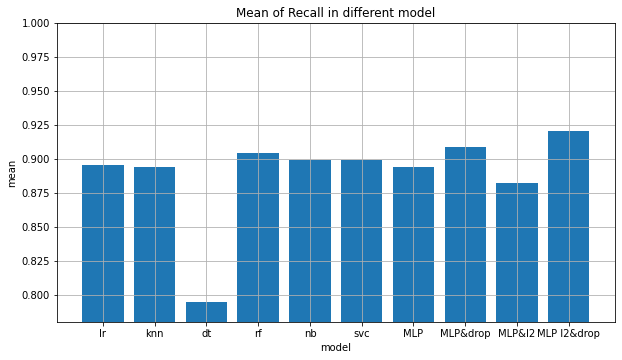

In [230]:
model = ['lr','knn','dt','rf','nb','svc','MLP','MLP&drop','MLP&l2','MLP l2&drop']
mean = [lr_xb,knn_xb,dt_xb,rf_xb,nb_xb,svc_xb,MLP0_xb,MLPd_xb,MLPl2_xb,MLP_xb]

plt.figure(figsize=(10,5.5))
plt.bar(model, mean)
plt.title('Mean of Recall in different model')
plt.xlabel('model')
plt.ylim(0.78, 1)
plt.ylabel('mean')
plt.grid(True)
plt.show()

###Compare S.D.

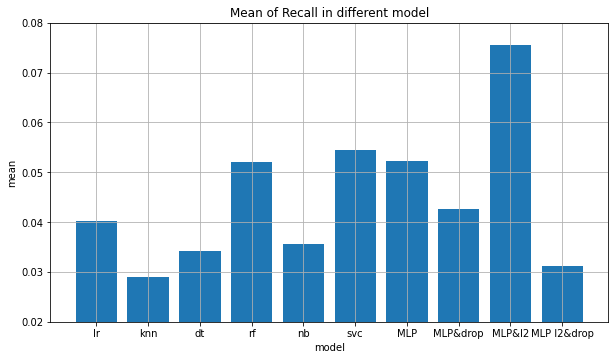

In [231]:
model = ['lr','knn','dt','rf','nb','svc','MLP','MLP&drop','MLP&l2','MLP l2&drop']
mean = [lr_sd,knn_sd,dt_sd,rf_sd,nb_sd,svc_sd,MLP0_sd,MLPd_sd,MLPl2_sd,MLP_sd]

plt.figure(figsize=(10,5.5))
plt.bar(model, mean)
plt.title('Mean of Recall in different model')
plt.xlabel('model')
plt.ylim(0.02, 0.08)
plt.ylabel('mean')
plt.grid(True)
plt.show()

##F1

###data frame

In [232]:
ex_F1_res

,model,100,123,200,231,300,mean,S.D.
0,Logistic regression,0.842809,0.893891,0.880503,0.897436,0.880503,0.879028,0.021656
1,KNN,0.843137,0.884615,0.888179,0.893204,0.891720,0.880171,0.020968
2,Decision tree,0.769737,0.784314,0.830671,0.802721,0.814570,0.800402,0.024091
3,Random forest,0.836120,0.877743,0.904025,0.882540,0.884735,0.877033,0.024963
4,NB,0.848684,0.880259,0.886792,0.913738,0.874214,0.880737,0.023430
5,SVC,0.839590,0.898089,0.894410,0.903226,0.869565,0.880976,0.026511


In [233]:
MLP_F1_xb_sd_frame

,MLP method,Mean,S.D.
0,Only MLP,0.879177,0.028635
1,MLP with drop out,0.886167,0.023284
2,MLP with l2,0.873178,0.033210
3,MLP with l2 & drop out,0.884875,0.011695


###Get mean&S.D.

In [234]:
lr_xb=statistics.mean(lr_F1_temp)
knn_xb=statistics.mean(knn_F1_temp)
dt_xb=statistics.mean(dt_F1_temp)
rf_xb=statistics.mean(rf_F1_temp)
nb_xb=statistics.mean(nb_F1_temp)
svc_xb=statistics.mean(svc_F1_temp)

lr_sd=statistics.stdev(lr_F1_temp)
knn_sd=statistics.stdev(knn_F1_temp)
dt_sd=statistics.stdev(dt_F1_temp)
rf_sd=statistics.stdev(rf_F1_temp)
nb_sd=statistics.stdev(nb_F1_temp)
svc_sd=statistics.stdev(svc_F1_temp)

MLP0_xb=statistics.mean(MLP0_F1_temp)
MLPd_xb=statistics.mean(MLPd_F1_temp)
MLPl2_xb=statistics.mean(MLPl2_F1_temp)
MLP_xb=statistics.mean(MLP_F1_temp)

MLP0_sd=statistics.stdev(MLP0_F1_temp)
MLPd_sd=statistics.stdev(MLPd_F1_temp)
MLPl2_sd=statistics.stdev(MLPl2_F1_temp)
MLP_sd=statistics.stdev(MLP_F1_temp)

###Compare mean

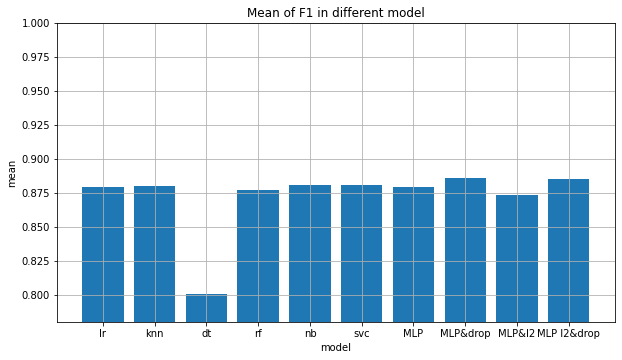

In [235]:
model = ['lr','knn','dt','rf','nb','svc','MLP','MLP&drop','MLP&l2','MLP l2&drop']
mean = [lr_xb,knn_xb,dt_xb,rf_xb,nb_xb,svc_xb,MLP0_xb,MLPd_xb,MLPl2_xb,MLP_xb]

plt.figure(figsize=(10,5.5))
plt.bar(model, mean)
plt.title('Mean of F1 in different model')
plt.xlabel('model')
plt.ylim(0.78, 1)
plt.ylabel('mean')
plt.grid(True)
plt.show()

###Compare S.D.

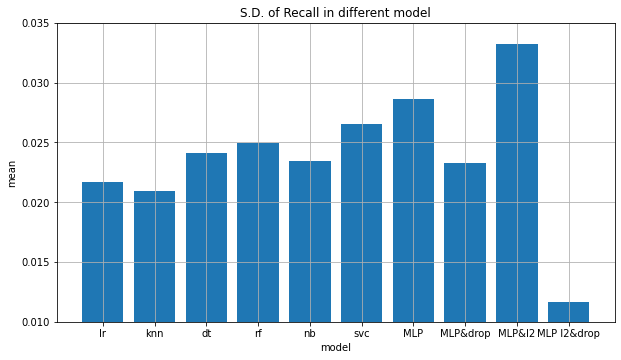

In [236]:
model = ['lr','knn','dt','rf','nb','svc','MLP','MLP&drop','MLP&l2','MLP l2&drop']
mean = [lr_sd,knn_sd,dt_sd,rf_sd,nb_sd,svc_sd,MLP0_sd,MLPd_sd,MLPl2_sd,MLP_sd]

plt.figure(figsize=(10,5.5))
plt.bar(model, mean)
plt.title('S.D. of Recall in different model')
plt.xlabel('model')
plt.ylim(0.01, 0.035)
plt.ylabel('mean')
plt.grid(True)
plt.show()

##Train accuracy

###data frame

In [237]:
ex_acctr_res

,model,100,123,200,231,300,mean,S.D.
0,Logistic regression,0.878505,0.866044,0.869159,0.861371,0.870717,0.869159,0.006327
1,KNN,0.826087,0.869565,0.873188,0.880435,0.876812,0.865217,0.022246
2,Decision tree,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,Random forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,NB,0.884735,0.866044,0.862928,0.853583,0.872274,0.867913,0.011573
5,SVC,0.908100,0.887850,0.883178,0.880062,0.898754,0.891589,0.011635


In [238]:
MLP_acctr_xb_sd_frame

,MLP method,Mean,S.D.
0,Only MLP,0.881931,0.009241
1,MLP with drop out,0.878816,0.006553
2,MLP with l2,0.871028,0.005441
3,MLP with l2 & drop out,0.872274,0.006516


### Get mean&S.D.

In [239]:
lr_xb=statistics.mean(lr_acctr_temp)
knn_xb=statistics.mean(knn_acctr_temp)
dt_xb=statistics.mean(dt_acctr_temp)
rf_xb=statistics.mean(rf_acctr_temp)
nb_xb=statistics.mean(nb_acctr_temp)
svc_xb=statistics.mean(svc_acctr_temp)

lr_sd=statistics.stdev(lr_acctr_temp)
knn_sd=statistics.stdev(knn_acctr_temp)
dt_sd=statistics.stdev(dt_acctr_temp)
rf_sd=statistics.stdev(rf_acctr_temp)
nb_sd=statistics.stdev(nb_acctr_temp)
svc_sd=statistics.stdev(svc_acctr_temp)

MLP0_xb=statistics.mean(MLP0_acctr_temp)
MLPd_xb=statistics.mean(MLPd_acctr_temp)
MLPl2_xb=statistics.mean(MLPl2_acctr_temp)
MLP_xb=statistics.mean(MLP_acctr_temp)

MLP0_sd=statistics.stdev(MLP0_acctr_temp)
MLPd_sd=statistics.stdev(MLPd_acctr_temp)
MLPl2_sd=statistics.stdev(MLPl2_acctr_temp)
MLP_sd=statistics.stdev(MLP_acctr_temp)

###Compare mean

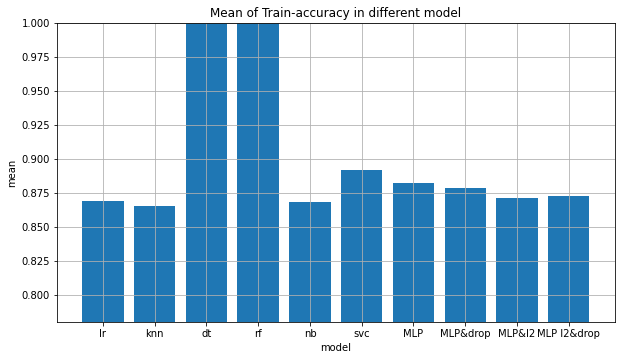

In [240]:
model = ['lr','knn','dt','rf','nb','svc','MLP','MLP&drop','MLP&l2','MLP l2&drop']
mean = [lr_xb,knn_xb,dt_xb,rf_xb,nb_xb,svc_xb,MLP0_xb,MLPd_xb,MLPl2_xb,MLP_xb]

plt.figure(figsize=(10,5.5))
plt.bar(model, mean)
plt.title('Mean of Train-accuracy in different model')
plt.xlabel('model')
plt.ylim(0.78, 1)
plt.ylabel('mean')
plt.grid(True)
plt.show()

###Compare S.D.

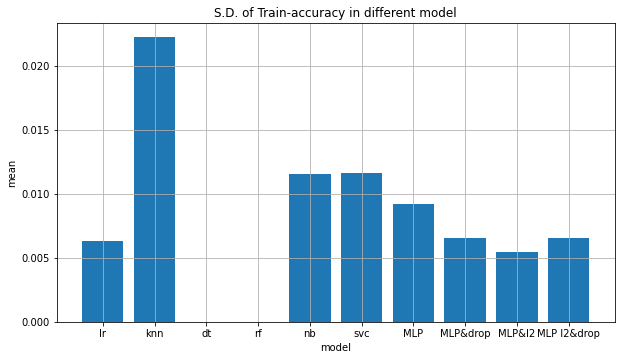

In [241]:
model = ['lr','knn','dt','rf','nb','svc','MLP','MLP&drop','MLP&l2','MLP l2&drop']
mean = [lr_sd,knn_sd,dt_sd,rf_sd,nb_sd,svc_sd,MLP0_sd,MLPd_sd,MLPl2_sd,MLP_sd]

plt.figure(figsize=(10,5.5))
plt.bar(model, mean)
plt.title('S.D. of Train-accuracy in different model')
plt.xlabel('model')
#plt.ylim(0.01, 0.035)
plt.ylabel('mean')
plt.grid(True)
plt.show()

##Test accuracy

###data frame

In [242]:
ex_acc_res

,model,100,123,200,231,300,mean,S.D.
0,Logistic regression,0.829710,0.880435,0.862319,0.884058,0.862319,0.863768,0.021527
1,KNN,0.894081,0.876947,0.875389,0.875389,0.880062,0.880374,0.007896
2,Decision tree,0.746377,0.760870,0.807971,0.789855,0.797101,0.780435,0.025824
3,Random forest,0.822464,0.858696,0.887681,0.865942,0.865942,0.860145,0.023704
4,NB,0.833333,0.865942,0.869565,0.902174,0.855072,0.865217,0.025024
5,SVC,0.829710,0.884058,0.876812,0.891304,0.847826,0.865942,0.026127


In [243]:
MLP_acc_xb_sd_frame

,MLP method,Mean,S.D.
0,Only MLP,0.864493,0.027901
1,MLP with drop out,0.871014,0.023842
2,MLP with l2,0.859420,0.029368
3,MLP with l2 & drop out,0.867391,0.012180


###Get mean&S.D.

In [244]:
lr_xb=statistics.mean(lr_acc_temp)
knn_xb=statistics.mean(knn_acc_temp)
dt_xb=statistics.mean(dt_acc_temp)
rf_xb=statistics.mean(rf_acc_temp)
nb_xb=statistics.mean(nb_acc_temp)
svc_xb=statistics.mean(svc_acc_temp)

lr_sd=statistics.stdev(lr_acc_temp)
knn_sd=statistics.stdev(knn_acc_temp)
dt_sd=statistics.stdev(dt_acc_temp)
rf_sd=statistics.stdev(rf_acc_temp)
nb_sd=statistics.stdev(nb_acc_temp)
svc_sd=statistics.stdev(svc_acc_temp)

MLP0_xb=statistics.mean(MLP0_acc_temp)
MLPd_xb=statistics.mean(MLPd_acc_temp)
MLPl2_xb=statistics.mean(MLPl2_acc_temp)
MLP_xb=statistics.mean(MLP_acc_temp)

MLP0_sd=statistics.stdev(MLP0_acc_temp)
MLPd_sd=statistics.stdev(MLPd_acc_temp)
MLPl2_sd=statistics.stdev(MLPl2_acc_temp)
MLP_sd=statistics.stdev(MLP_acc_temp)

###Compare mean

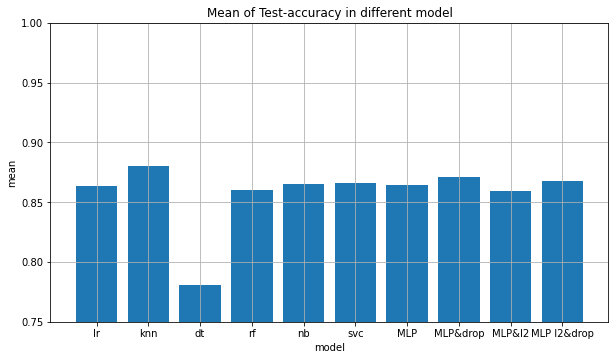

In [245]:
model = ['lr','knn','dt','rf','nb','svc','MLP','MLP&drop','MLP&l2','MLP l2&drop']
mean = [lr_xb,knn_xb,dt_xb,rf_xb,nb_xb,svc_xb,MLP0_xb,MLPd_xb,MLPl2_xb,MLP_xb]

plt.figure(figsize=(10,5.5))
plt.bar(model, mean)
plt.title('Mean of Test-accuracy in different model')
plt.xlabel('model')
plt.ylim(0.75, 1)
plt.ylabel('mean')
plt.grid(True)
plt.show()

###Compare S.D.

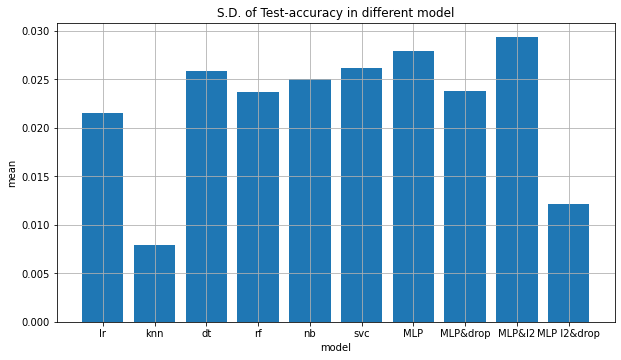

In [246]:
model = ['lr','knn','dt','rf','nb','svc','MLP','MLP&drop','MLP&l2','MLP l2&drop']
mean = [lr_sd,knn_sd,dt_sd,rf_sd,nb_sd,svc_sd,MLP0_sd,MLPd_sd,MLPl2_sd,MLP_sd]

plt.figure(figsize=(10,5.5))
plt.bar(model, mean)
plt.title('S.D. of Test-accuracy in different model')
plt.xlabel('model')
#plt.ylim(0.01, 0.035)
plt.ylabel('mean')
plt.grid(True)
plt.show()

##Different of Accuracy

###data frame

In [247]:
ex_delta_res

,model,100,123,200,231,300,mean,S.D.
0,Logistic regression,0.048795,-0.014391,0.006840,-0.022687,0.008398,0.005391,0.027725
1,KNN,-0.067994,-0.007382,-0.002201,0.005045,-0.003251,-0.015156,0.029875
2,Decision tree,0.253623,0.239130,0.192029,0.210145,0.202899,0.219565,0.025824
3,Random forest,0.177536,0.141304,0.112319,0.134058,0.134058,0.139855,0.023704
4,NB,0.051402,0.000102,-0.006637,-0.048591,0.017202,0.002695,0.036424
5,SVC,0.078390,0.003792,0.006366,-0.011242,0.050928,0.025647,0.037520


In [248]:
MLP_delta_xb_sd_frame

,MLP method,Mean,S.D.
0,Only MLP,0.017439,0.033120
1,MLP with drop out,0.007802,0.029579
2,MLP with l2,0.011608,0.032239
3,MLP with l2 & drop out,0.004883,0.017984


###Get mean&S.D.

In [249]:
lr_xb=statistics.mean(lr_delta_temp)
knn_xb=statistics.mean(knn_delta_temp)
dt_xb=statistics.mean(dt_delta_temp)
rf_xb=statistics.mean(rf_delta_temp)
nb_xb=statistics.mean(nb_delta_temp)
svc_xb=statistics.mean(svc_delta_temp)

lr_sd=statistics.stdev(lr_delta_temp)
knn_sd=statistics.stdev(knn_delta_temp)
dt_sd=statistics.stdev(dt_delta_temp)
rf_sd=statistics.stdev(rf_delta_temp)
nb_sd=statistics.stdev(nb_delta_temp)
svc_sd=statistics.stdev(svc_delta_temp)

MLP0_xb=statistics.mean(MLP0_delta_temp)
MLPd_xb=statistics.mean(MLPd_delta_temp)
MLPl2_xb=statistics.mean(MLPl2_delta_temp)
MLP_xb=statistics.mean(MLP_delta_temp)

MLP0_sd=statistics.stdev(MLP0_delta_temp)
MLPd_sd=statistics.stdev(MLPd_delta_temp)
MLPl2_sd=statistics.stdev(MLPl2_delta_temp)
MLP_sd=statistics.stdev(MLP_delta_temp)

###Compare mean

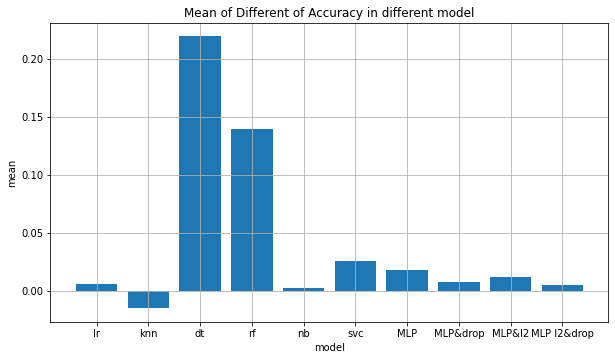

In [250]:
model = ['lr','knn','dt','rf','nb','svc','MLP','MLP&drop','MLP&l2','MLP l2&drop']
mean = [lr_xb,knn_xb,dt_xb,rf_xb,nb_xb,svc_xb,MLP0_xb,MLPd_xb,MLPl2_xb,MLP_xb]

plt.figure(figsize=(10,5.5))
plt.bar(model, mean)
plt.title('Mean of Different of Accuracy in different model')
plt.xlabel('model')
#plt.ylim(0.75, 1)
plt.ylabel('mean')
plt.grid(True)
plt.show()

###Compare S.D.

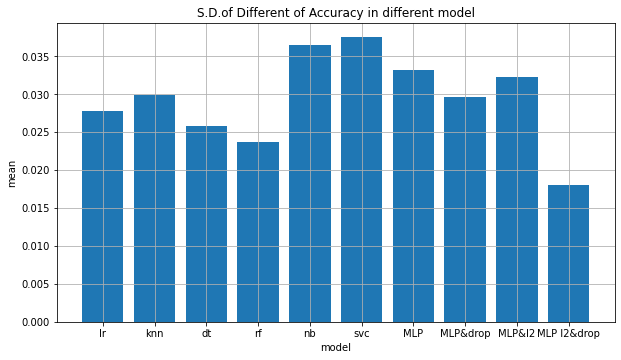

In [251]:
model = ['lr','knn','dt','rf','nb','svc','MLP','MLP&drop','MLP&l2','MLP l2&drop']
mean = [lr_sd,knn_sd,dt_sd,rf_sd,nb_sd,svc_sd,MLP0_sd,MLPd_sd,MLPl2_sd,MLP_sd]

plt.figure(figsize=(10,5.5))
plt.bar(model, mean)
plt.title('S.D.of Different of Accuracy in different model')
plt.xlabel('model')
#plt.ylim(0.01, 0.035)
plt.ylabel('mean')
plt.grid(True)
plt.show()